In [1]:
import numpy # pandas library requires newer version of numpy, so to add it in requirements.txt
import pandas as pd

weather = pd.read_csv("data/IndianWeatherRepository.csv", index_col="last_updated")

<AxesSubplot:xlabel='last_updated'>

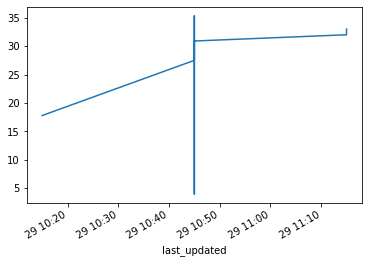

In [16]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
valid_columns = weather.columns[null_pct < .05]
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()
weather = weather.ffill()
weather.apply(pd.isnull).sum()
weather.apply(lambda x: (x == 9999).sum())
weather.index = pd.to_datetime(weather.index)
weather.index.year.value_counts().sort_index()
weather["temperature_celsius"].plot()

In [44]:
weather["target"] = weather.shift(-1)["temperature_celsius"]
weather = weather.ffill()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_pm10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,target
last_updated,,,,,,,,,,,,,,,,,,,,,
2023-08-29 10:45:00,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,27.5,81.5,Partly cloudy,...,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93,27.5
2023-08-29 10:45:00,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,27.5,81.5,Sunny,...,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93,26.3
2023-08-29 10:45:00,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,26.3,79.3,Partly cloudy,...,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93,25.6
2023-08-29 10:45:00,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,25.6,78.1,Cloudy,...,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93,27.2
2023-08-29 10:45:00,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,27.2,81.0,Cloudy,...,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93,25.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29 10:45:00,India,Siang,Chhattisgarh,22.60,83.05,Asia/Kolkata,1693286100,29.0,84.2,Sunny,...,18.5,2,2,05:40 AM,06:18 PM,05:16 PM,03:20 AM,Waxing Gibbous,93,28.3
2023-08-29 10:45:00,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1693286100,28.3,82.9,Partly cloudy,...,9.9,1,1,05:00 AM,05:41 PM,04:39 PM,02:37 AM,Waxing Gibbous,93,32.2
2023-08-29 10:45:00,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1693286100,32.2,90.0,Partly cloudy,...,3.0,1,1,06:02 AM,06:26 PM,05:14 PM,03:56 AM,Waxing Gibbous,93,31.7


In [43]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

predictors = weather.columns[~weather.columns.isin(["target", "location_name", "region"])]
print(predictors)

def backtest(weather, model, predictors, start=0, step=10):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        # preds = model.predict(test[predictors])
        # preds = pd.Series(preds, index=test.index)
        # combined = pd.concat([test["target"], preds], axis=1)
        # combined.columns = ["actual", "prediction"]
        # combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        # print(train)
        # all_predictions.append(combined)
    # return pd.concat(all_predictions)
    

predictions = backtest(weather, rr, predictors)

Index(['country', 'latitude', 'longitude', 'timezone', 'last_updated_epoch',
       'temperature_celsius', 'temperature_fahrenheit', 'condition_text',
       'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb',
       'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud',
       'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_carbon_monoxide', 'air_quality_ozone',
       'air_quality_nitrogen_dioxide', 'air_quality_sulphur_dioxide',
       'air_quality_pm2.5', 'air_quality_pm10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


ValueError: Found array with 0 sample(s) (shape=(0, 39)) while a minimum of 1 is required.

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

predictions.sort_values("diff", ascending=False)
pd.Series(rr.coef_, index=predictors)

prcp   -1.236110
snow   -0.407827
snwd    0.053422
tmax    0.447413
tmin    0.517302
dtype: float64

In [6]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

<AxesSubplot:>

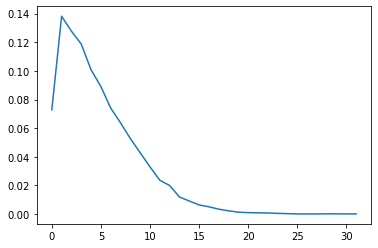

In [7]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])
mean_squared_error(predictions["actual"], predictions["prediction"])
predictions.sort_values("diff", ascending=False)
weather.loc["1990-03-07": "1990-03-17"]
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

<AxesSubplot:xlabel='DATE'>

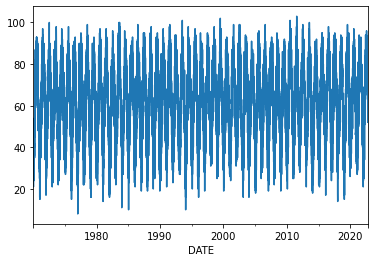

In [8]:
weather["target"].plot()

In [9]:
mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)

6.128586225318433

In [10]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,54.0,32.456685,21.543315
1980-01-14,51.0,44.691816,6.308184
1980-01-15,45.0,46.860712,1.860712
1980-01-16,40.0,42.201133,2.201133
1980-01-17,41.0,40.841305,0.158695
...,...,...,...
2022-10-17,58.0,67.010448,9.010448
2022-10-18,56.0,62.415946,6.415946
2022-10-19,61.0,59.725121,1.274879


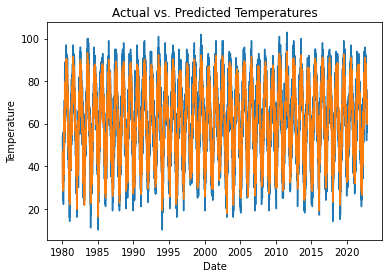

In [11]:
# show the graph of the predictions with the actuals
import matplotlib.pyplot as plt
plt.plot(predictions["actual"])
plt.plot(predictions["prediction"])
# stretch this graph to make it larger
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Actual vs. Predicted Temperatures")
plt.show()


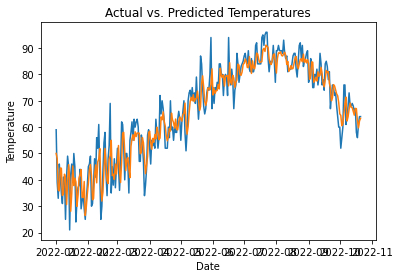

In [12]:
plt.plot(predictions["actual"]["2022"])
plt.plot(predictions["prediction"]["2022"])
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Actual vs. Predicted Temperatures")
plt.show()